In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
zero = plt.imread('../data/data/0/0_1.bmp')

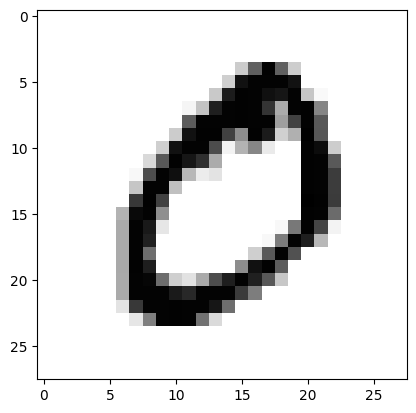

In [5]:
plt.imshow(zero, cmap = 'gray')

In [12]:
temps = [] #用来存储图像数据
target = [] #存储与图像对应的目标值
for i in range(10):
    for j in range(1, 501):
        #路径是通过字符串格式自动生成的
        temp = plt.imread(f'../data/data/{i}/{i}_{j}.bmp')
        temps.append(temp)
        target.append(i)

In [13]:
len(temps)

5000

In [14]:
len(target)

5000

In [15]:
data = np.array(temps)

In [16]:
target = np.array(target)

In [17]:
data.shape

(5000, 28, 28)

In [18]:
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [19]:
#训练数据必须要是二维的
data = data.reshape(5000, -1)

In [20]:
data.shape

(5000, 784)

In [22]:
#model_selection:提供了如数据集划分、交叉验证等用于模型选择和评估的功能
from sklearn.model_selection import train_test_split

In [30]:
#test_size : 表示测试集占总数据集的比例
X_train,X_test, y_train, y_test = train_test_split(data,target,test_size = 0.2)

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
y_ = knn.predict(X_test)

In [34]:
knn.score(data,target)

0.9522

In [36]:
knn.score(X_test, y_test)

0.939

In [37]:
knn.score(X_train, y_train)

0.9555

In [39]:
X_test

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(1000, 784), dtype=uint8)

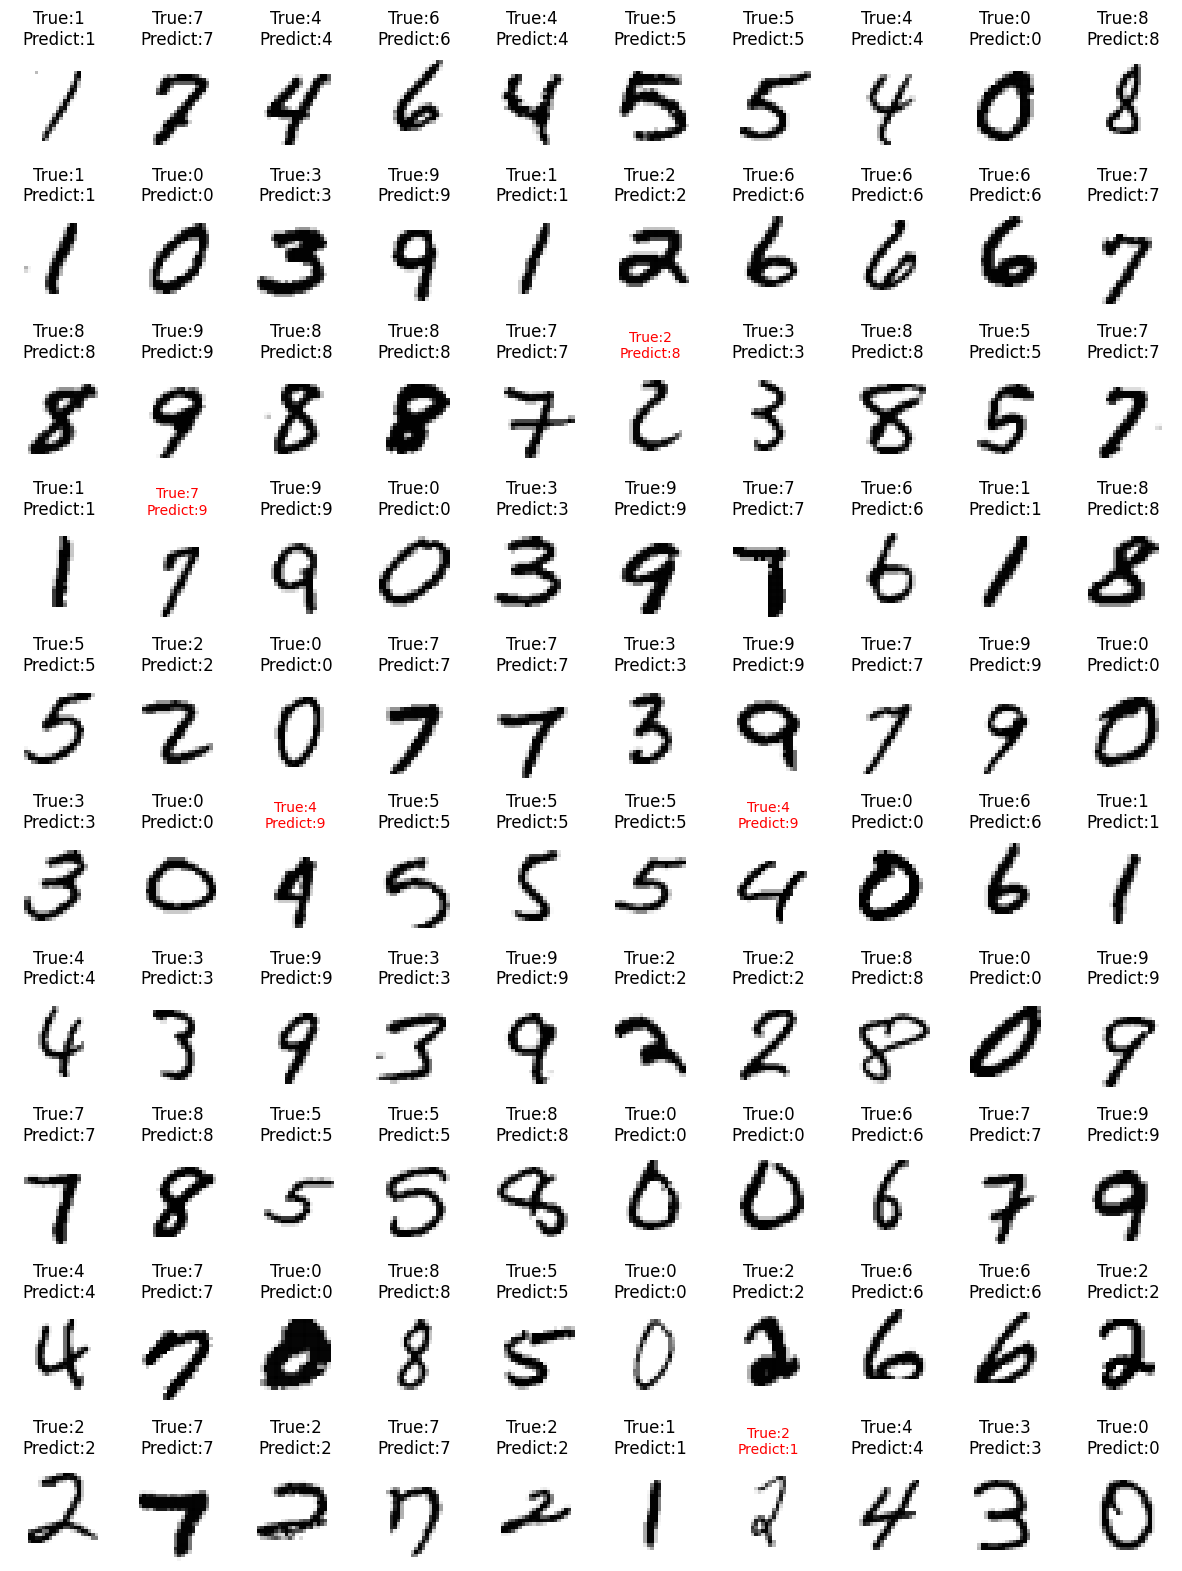

In [38]:
#plt.figure : 用于创建新的图形窗口
plt.figure(figsize = (10 * 1.5, 10 * 2))
for i in range(100):
    axes = plt.subplot(10, 10, i + 1)
    axes.imshow(X_test[i * 10].reshape(28,28), cmap = 'gray')
    axes.axis('off')
    if y_test[i * 10] != y_[i * 10]:
        #set_title : 设置子图的标题
        axes.set_title('True:%s\nPredict:%s' % (y_test[i * 10], y_[i * 10]),fontdict = dict(color = 'r', size = 10))
    else:
        axes.set_title('True:%s\nPredict:%s' % (y_test[i * 10],y_[i* 10]))